# BEFORE

Text(0.5, 1.0, 'quality of life (khusus sehat)')

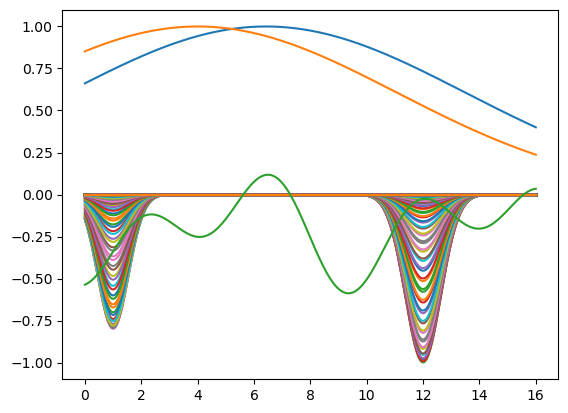

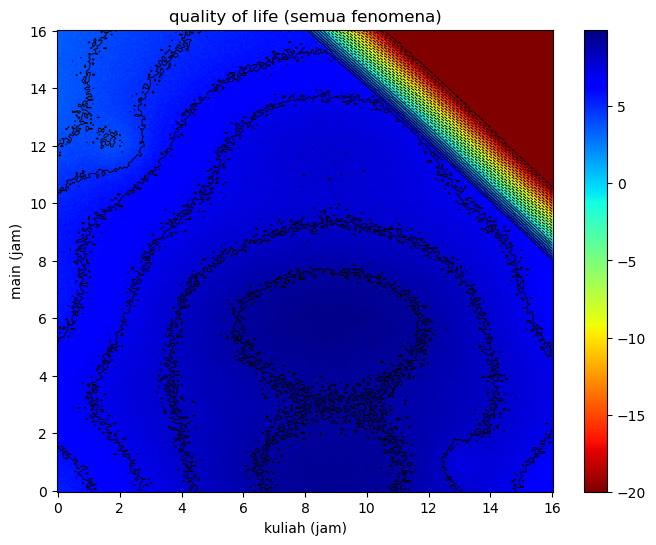

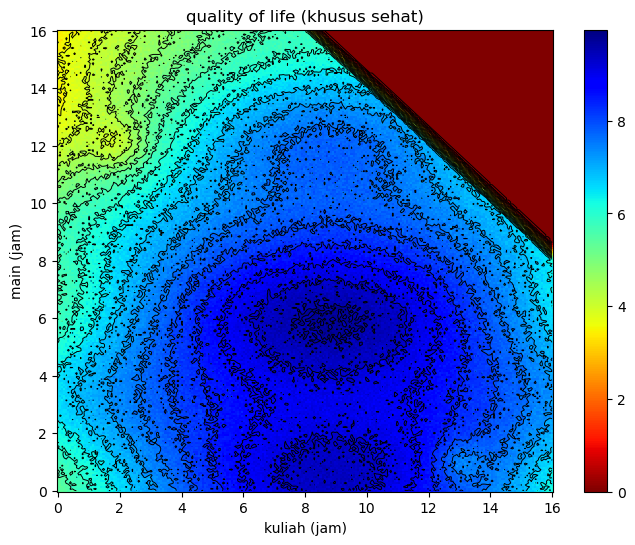

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

istirahat= 8 # istirahat yang cukup

# Grid setup
xmin, xmax, ymin, ymax = 0, 24-istirahat, 0, 24-istirahat
res = 240
x = np.linspace(xmin, xmax, res) # kuliah
y = np.linspace(ymin, ymax, res) # main
X, Y = np.meshgrid(x, y)

# kuliah 
plt.plot(x, np.exp(-((x -((45.0/7)))**2) / (10**2))) # kuliah
kuliah_pref = np.exp(-((x -(9.0))**2) / (10**2))

# bermain, game, instagram, tiktok, dlsb
plt.plot(y, np.exp(-((y -4.0)**2) / (10**2))) # main
main_pref = np.exp(-((Y - 4.0)**2) / (10**2))

# kalau total siklus main-kerja lebih dari 24 jam, merusak ritme sirkadian
total_waktu = X + Y
total_penalty = 0.2 * np.exp(total_waktu / 24.0)  # stronger, narrower penalty
#plt.plot(x, -total_penalty)

# terlena
kebanyakan_main = 1 * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)   # kebanyakan main
plt.plot(x, -kebanyakan_main)
# burnout
kebanyakan_lembur = 0.8 * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)  # kebanyakan lembur
plt.plot(y, -kebanyakan_lembur )

# naik-turun motivasi harian
NPM = 12391
np.random.seed(NPM)
plt.plot(x, 0.4 * np.sin((0.3 * x)-1) * np.cos(1.0 * y) -0.2)
ripple = 0.4 * np.sin((0.3 * X)-1) * np.cos(1.0 * Y) -0.2
noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
ripple += noise

# objective function
# quality of life
# edit preferensi di sini, tiap orang bisa beda prioritas
Z = 10.0 * (0.6 * kuliah_pref + 0.4 * main_pref)
Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple 

# clip tidak lebih dari 24 jam
Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)

# clip fenomena semua
Z_clip = np.clip(Z, -20, 20)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (semua fenomena)")

# clip fenomena 'sehat'
Z_clip = np.clip(Z, 0, 10)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (khusus sehat)")


## TUGAS

#### 1) mainkan paramter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)
##### 1a) plot grafik-grafik secara berdampingan untuk membandingkan skalanya
#### 2) tambahkan faktor-faktor ke objective function (jika perlu)
#### 3) temukan titik optimum sesuai diri masing-masing, temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax
#### 4) buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat (poin 4 paling penting)

### - global optimum,
#### idx = np.unravel_index(np.argmax(Z_clip), Z_clip.shape)
#### opt_x, opt_y, opt_z = X[idx], Y[idx], Z_clip[idx]

# AFTER

### STUDI KASUS : Aktivitas harian saya 
- Pagi (07.20– 07.25): Perjalanan dari asrama ke kampus
- Pagi (07.30 – 12.30): Kuliah 
- Siang (12.30 – 13.30): Makan siang & istirahat
- Siang (13.30 – 15.00): kuliah
- Sore (15.00 – 16.00): refreshing sejenak
- Sore (16.00 – 16.05): Perjalanan pulang dari kampus ke asrama
- Sore (16.30– 17.00): bersih-bersih 
- Sore sampe malam (17.00 – 20.00): main sosmed 
- malam (20.00 – 22.00): belajar
- malam (22.00 – 23.00): main sosmed
- tidur (23.00 - 05.30) tidur
Waktu istirahat cukup penting untuk menjaga kesehatan fisik & mental.

In [15]:
# Nama: Olivia Natasya Yuniar
# NPM: 24083010012

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. PARAMETER YANG BISA DIMAINKAN
NPM = 12
np.random.seed(12)

istirahat = 7.0       # jam tidur (ubah ke 6, 7, 8 untuk lihat pengaruhnya)
scale_kuliah = 0.6    # bobot preferensi kuliah
scale_main = 0.4      # bobot preferensi main
penalty_factor = 0.3  # faktor hukuman kalau kebanyakan
decay = 10.0          # penyebaran kurva Gaussian
res = 240             # resolusi grid

# 2. SETUP GRID
xmin, xmax = 0, 24 - istirahat
ymin, ymax = 0, 24 - istirahat
x = np.linspace(xmin, xmax, res)  # jam kuliah
y = np.linspace(ymin, ymax, res)  # jam main

# 3. FUNGSI PREFERENSI & PENALTI
kuliah_pref = np.exp(-((X - 8.0)**2) / (decay**2))
main_pref   = np.exp(-((Y - 3.5)**2) / (decay**2))
total_waktu = X + Y
total_penalty = penalty_factor * np.exp(total_waktu / 24.0)
kebanyakan_main = np.exp(-((X - 2.0)**2 + (Y - 10.0)**2) / 0.8)
kebanyakan_lembur = 0.8 * np.exp(-((X - 12.0)**2 + (Y - 1.0)**2) / 0.6)
ripple = 0.4 * np.sin((0.3 * X) - 1) * np.cos(1.0 * Y) - 0.2
ripple += np.random.normal(loc=0.0, scale=0.05, size=X.shape)

# 4. OBJECTIVE FUNCTION
Z = 10.0 * (scale_kuliah * kuliah_pref + scale_main * main_pref)
Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple
Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)
Z_clip = np.clip(Z, -20, 20)

# 5. TEMUKAN TITIK OPTIMUM (NUMERIK)
opt_x, opt_y, opt_z = None, None, -np.inf
for i in range(Z_clip.shape[0]):
    for j in range(Z_clip.shape[1]):
        if Z_clip[i, j] > opt_z:
            opt_x, opt_y, opt_z = X[i, j], Y[i, j], Z_clip[i, j]
print(f"Titik optimum: Kuliah {opt_x:.2f} jam, Main {opt_y:.2f} jam, Skor {opt_z:.2f}\n")


Titik optimum: Kuliah 8.54 jam, Main 5.98 jam, Skor 9.55



Preferensi Kuliah: ideal di 6–9 jam, terlalu sedikit/berlebihan menurunkan kualitas.
Preferensi Main: ideal di 3–4 jam, cukup untuk refreshing tanpa berlebihan.
Penalty Total Waktu: semakin banyak total jam kuliah+main, semakin berat penalti.
Penalty Kebanyakan Main: terlalu banyak main (>10 jam) membuat skor turun drastis.
Penalty Kebanyakan Lembur: kuliah berlebihan (>12 jam) menyebabkan burnout.
Ripple Motivasi: naik-turun motivasi harian, dipengaruhi faktor eksternal.



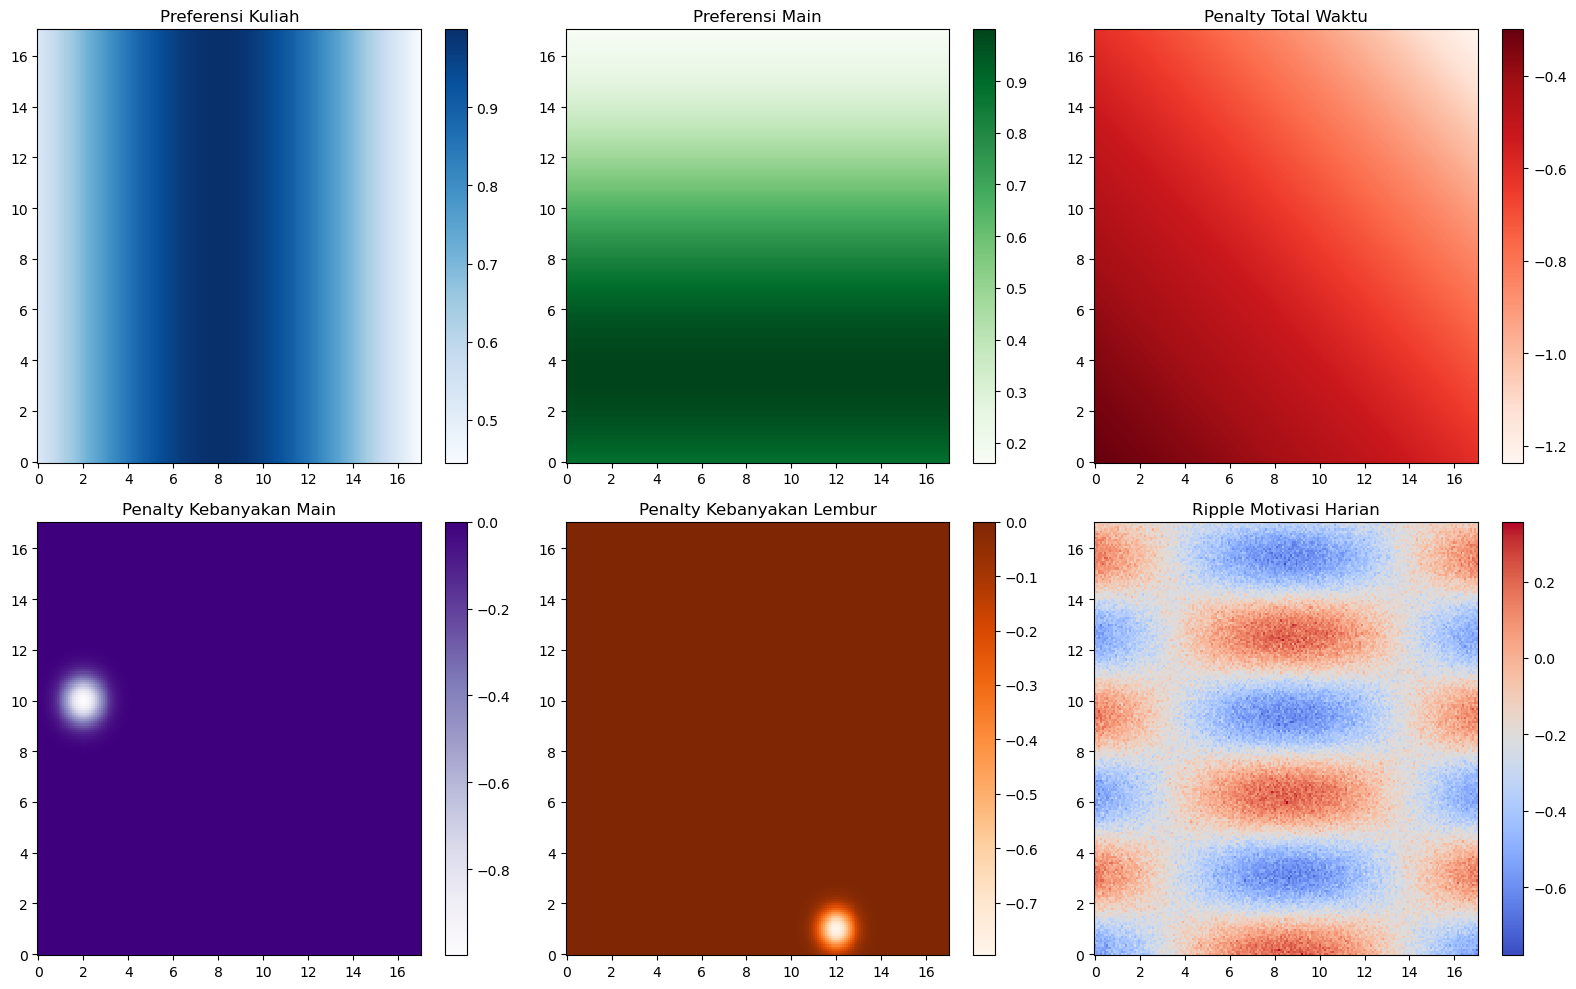

In [17]:
# 6. PLOT GRAFIK PERBANDINGAN
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

c1 = axes[0,0].pcolormesh(X, Y, kuliah_pref, cmap='Blues', shading='auto')
axes[0,0].set_title("Preferensi Kuliah")
fig.colorbar(c1, ax=axes[0,0])
print("Preferensi Kuliah: ideal di 6–9 jam, terlalu sedikit/berlebihan menurunkan kualitas.")

c2 = axes[0,1].pcolormesh(X, Y, main_pref, cmap='Greens', shading='auto')
axes[0,1].set_title("Preferensi Main")
fig.colorbar(c2, ax=axes[0,1])
print("Preferensi Main: ideal di 3–4 jam, cukup untuk refreshing tanpa berlebihan.")

c3 = axes[0,2].pcolormesh(X, Y, -total_penalty, cmap='Reds', shading='auto')
axes[0,2].set_title("Penalty Total Waktu")
fig.colorbar(c3, ax=axes[0,2])
print("Penalty Total Waktu: semakin banyak total jam kuliah+main, semakin berat penalti.")

c4 = axes[1,0].pcolormesh(X, Y, -kebanyakan_main, cmap='Purples', shading='auto')
axes[1,0].set_title("Penalty Kebanyakan Main")
fig.colorbar(c4, ax=axes[1,0])
print("Penalty Kebanyakan Main: terlalu banyak main (>10 jam) membuat skor turun drastis.")

c5 = axes[1,1].pcolormesh(X, Y, -kebanyakan_lembur, cmap='Oranges', shading='auto')
axes[1,1].set_title("Penalty Kebanyakan Lembur")
fig.colorbar(c5, ax=axes[1,1])
print("Penalty Kebanyakan Lembur: kuliah berlebihan (>12 jam) menyebabkan burnout.")

c6 = axes[1,2].pcolormesh(X, Y, ripple, cmap='coolwarm', shading='auto')
axes[1,2].set_title("Ripple Motivasi Harian")
fig.colorbar(c6, ax=axes[1,2])
print("Ripple Motivasi: naik-turun motivasi harian, dipengaruhi faktor eksternal.\n")

plt.tight_layout()
plt.show()


Quality of Life (Semua Faktor): hasil gabungan preferensi, penalti, dan ripple.
Quality of Life (Zona Sehat): fokus hanya pada area realistis (0–10).



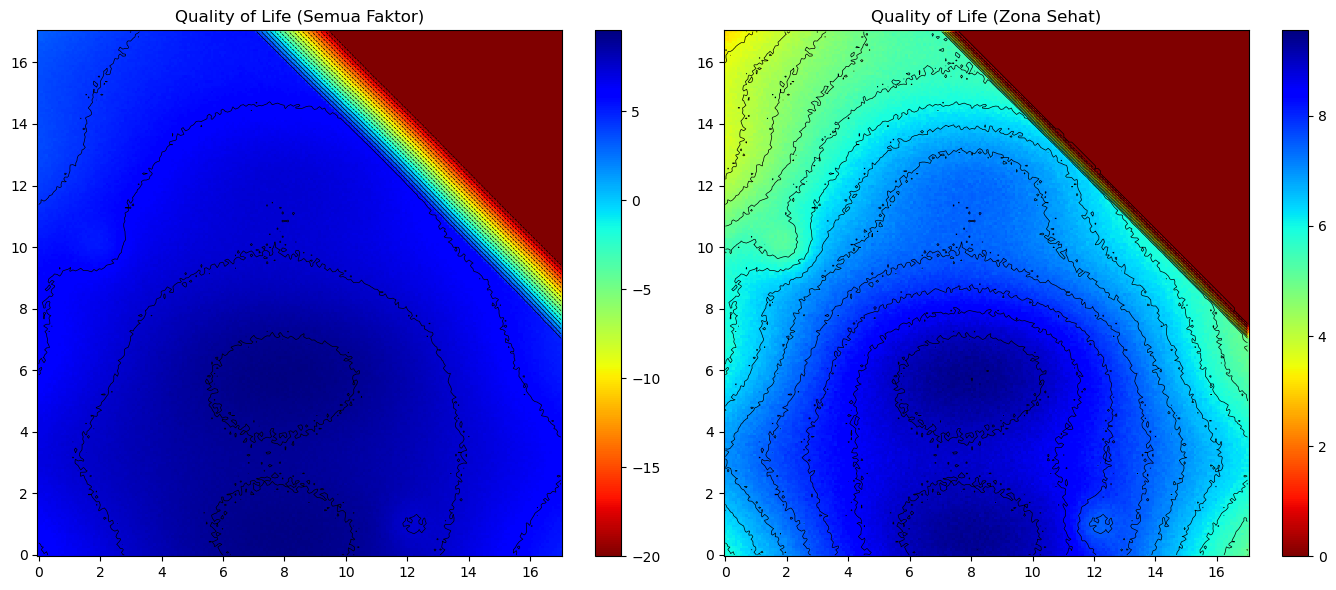

=== Cerita Aktivitas Harian Sehat (versi optimasi) ===
Tidur: 9 jam (cukup untuk kesehatan).
Kuliah/belajar: 9 jam (fokus, tidak berlebihan).
Hiburan/main sosmed: 6 jam (cukup untuk refreshing).
Sisanya bisa untuk makan, olahraga, dan aktivitas sosial.
Saran: pertahankan keseimbangan ini agar motivasi stabil dan terhindar dari burnout.



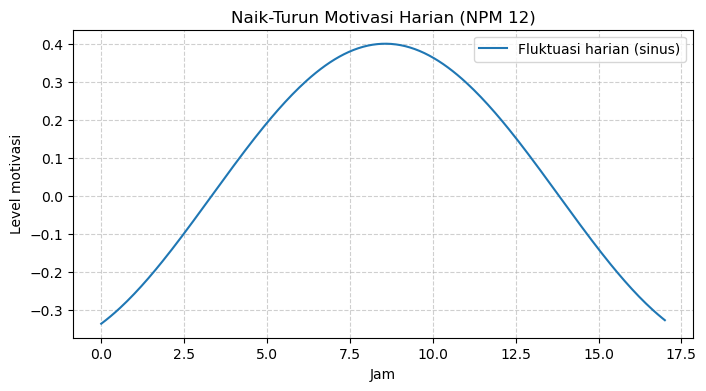

Grafik motivasi harian: menunjukkan fluktuasi naik-turun sepanjang hari.



In [19]:
# 7. PLOT HASIL FINAL
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

c1 = axes[0].pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
axes[0].contour(X, Y, Z_clip, levels=20, colors='black', linewidths=0.5)
axes[0].set_title("Quality of Life (Semua Faktor)")
fig.colorbar(c1, ax=axes[0])

c2 = axes[1].pcolormesh(X, Y, np.clip(Z, 0, 10), cmap='jet_r', shading='auto')
axes[1].contour(X, Y, np.clip(Z, 0, 10), levels=20, colors='black', linewidths=0.5)
axes[1].set_title("Quality of Life (Zona Sehat)")
fig.colorbar(c2, ax=axes[1])

print("Quality of Life (Semua Faktor): hasil gabungan preferensi, penalti, dan ripple.")
print("Quality of Life (Zona Sehat): fokus hanya pada area realistis (0–10).\n")

plt.tight_layout()
plt.show()

# 8. CERITA AKTIVITAS HARIAN
kuliah_opt = round(opt_x)
main_opt   = round(opt_y)
tidur_opt  = round(24 - (kuliah_opt + main_opt))

print("=== Cerita Aktivitas Harian Sehat (versi optimasi) ===")
print(f"Tidur: {tidur_opt} jam (cukup untuk kesehatan).")
print(f"Kuliah/belajar: {kuliah_opt} jam (fokus, tidak berlebihan).")
print(f"Hiburan/main sosmed: {main_opt} jam (cukup untuk refreshing).")
print("Sisanya bisa untuk makan, olahraga, dan aktivitas sosial.")
print("Saran: pertahankan keseimbangan ini agar motivasi stabil dan terhindar dari burnout.\n")

# 9. VISUALISASI RIPPLE MOTIVASI
plt.figure(figsize=(8, 4))
plt.plot(x, 0.4 * np.sin((0.3 * x) - 1), label="Fluktuasi harian (sinus)")
plt.title(f"Naik-Turun Motivasi Harian (NPM {NPM})")
plt.xlabel("Jam")
plt.ylabel("Level motivasi")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
print("Grafik motivasi harian: menunjukkan fluktuasi naik-turun sepanjang hari.\n")
